<a href="https://colab.research.google.com/github/ukanidarshan/Projects/blob/main/Image_Captioning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle


In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d adityajn105/flickr8k

Dataset URL: https://www.kaggle.com/datasets/adityajn105/flickr8k
License(s): CC0-1.0


In [4]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/flickr8k.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
import pandas as pd

df = pd.read_csv('/content/captions.txt')
# df.columns = ['image','caption']
df.head()

,image,caption
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...


In [6]:
# Group by 'image' and aggregate captions into separate columns
df_grouped = df.groupby('image')['caption'].apply(list).reset_index()

# Convert list of captions into separate columns
df_grouped[['caption1', 'caption2', 'caption3', 'caption4', 'caption5']] = pd.DataFrame(df_grouped['caption'].to_list(), index=df_grouped.index)

# Drop the original 'caption' column
df_grouped = df_grouped.drop(columns=['caption'])


In [7]:
df_grouped

,image,caption1,caption2,caption3,caption4,caption5
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...,A girl going into a wooden building .,A little girl climbing into a wooden playhouse .,A little girl climbing the stairs to her playh...,A little girl in a pink dress going into a woo...
1,1001773457_577c3a7d70.jpg,A black dog and a spotted dog are fighting,A black dog and a tri-colored dog playing with...,A black dog and a white dog with brown spots a...,Two dogs of different breeds looking at each o...,Two dogs on pavement moving toward each other .
2,1002674143_1b742ab4b8.jpg,A little girl covered in paint sits in front o...,A little girl is sitting in front of a large p...,A small girl in the grass plays with fingerpai...,There is a girl with pigtails sitting in front...,Young girl with pigtails painting outside in t...
3,1003163366_44323f5815.jpg,A man lays on a bench while his dog sits by him .,A man lays on the bench to which a white dog i...,a man sleeping on a bench outside with a white...,A shirtless man lies on a park bench with his ...,man laying on bench holding leash of dog sitti...
4,1007129816_e794419615.jpg,A man in an orange hat starring at something .,A man wears an orange hat and glasses .,A man with gauges and glasses is wearing a Bli...,A man with glasses is wearing a beer can croch...,The man with pierced ears is wearing glasses a...
...,...,...,...,...,...,...
8086,990890291_afc72be141.jpg,A man does a wheelie on his bicycle on the sid...,A man is doing a wheelie on a mountain bike .,A man on a bicycle is on only the back wheel .,Asian man in orange hat is popping a wheelie o...,Man on a bicycle riding on only one wheel .
8087,99171998_7cc800ceef.jpg,A group is sitting around a snowy crevasse .,A group of people sit atop a snowy mountain .,A group of people sit in the snow overlooking ...,Five children getting ready to sled .,Five people are sitting together in the snow .
8088,99679241_adc853a5c0.jpg,A grey bird stands majestically on a beach whi...,A large bird stands in the water on the beach .,A tall bird is standing on the sand beside the...,A water bird standing at the ocean 's edge .,A white crane stands tall as it looks out upon...
8089,997338199_7343367d7f.jpg,A person stands near golden walls .,a woman behind a scrolled wall is writing,A woman standing near a decorated wall writes .,The walls are covered in gold and patterns .,"Woman writing on a pad in room with gold , dec..."


In [8]:
df_1000 = df_grouped.head(n=1000)

In [9]:
df_1000

,image,caption1,caption2,caption3,caption4,caption5
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...,A girl going into a wooden building .,A little girl climbing into a wooden playhouse .,A little girl climbing the stairs to her playh...,A little girl in a pink dress going into a woo...
1,1001773457_577c3a7d70.jpg,A black dog and a spotted dog are fighting,A black dog and a tri-colored dog playing with...,A black dog and a white dog with brown spots a...,Two dogs of different breeds looking at each o...,Two dogs on pavement moving toward each other .
2,1002674143_1b742ab4b8.jpg,A little girl covered in paint sits in front o...,A little girl is sitting in front of a large p...,A small girl in the grass plays with fingerpai...,There is a girl with pigtails sitting in front...,Young girl with pigtails painting outside in t...
3,1003163366_44323f5815.jpg,A man lays on a bench while his dog sits by him .,A man lays on the bench to which a white dog i...,a man sleeping on a bench outside with a white...,A shirtless man lies on a park bench with his ...,man laying on bench holding leash of dog sitti...
4,1007129816_e794419615.jpg,A man in an orange hat starring at something .,A man wears an orange hat and glasses .,A man with gauges and glasses is wearing a Bli...,A man with glasses is wearing a beer can croch...,The man with pierced ears is wearing glasses a...
...,...,...,...,...,...,...
995,2097407245_c798e0dcaf.jpg,A man in a winter jacket and knit cap stand wi...,A man is standing on dirt with his hands in th...,A man raises his arms on rocky beach .,One lone man with fist in the air with large r...,Man with outstretched arms standing on snow-co...
996,2097420505_439f63c863.jpg,A male hiker wearing a green jacket is posing ...,A man with a camera and an ice structure behin...,A man with a camera crouching on ice .,A man with a camera kneels in front of a giant...,The mountain climber prepares to take a photo .
997,2097489021_ca1b9f5c3b.jpg,A girl in a ballet fairy costume is touched by...,A young girl performing the nutcracker .,The little girl is standing on a stage dressed...,The tiny girl dressed in a butterfly ballet co...,Young girl waving turquiose leotard and pink t...
998,2098174172_e57d86ea03.jpg,A hiker is posing in front of snowy mountains .,A hiker is standing in before the mountain hol...,A man stands in front of snow covered mountains .,A man with two ski poles stands near a mountai...,The man wears a green hat and jacket while sta...


In [10]:
import cv2

def read_image(img_path):
  img = cv2.imread("/content/Images/"+img_path)
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  img = cv2.resize(img,(224,224))
  img = img/255.0
  img = np.array(img)
  return img

In [11]:
import numpy as np
df_1000['image'] = df_1000['image'].apply(read_image)

<ipython-input-11-5c13c5707e86>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1000['image'] = df_1000['image'].apply(read_image)


In [12]:
# df_1000

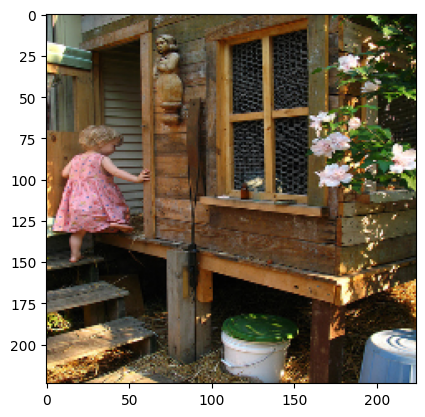

In [13]:
import matplotlib.pyplot as plt

plt.imshow(df_1000['image'][0])

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

In [15]:
corpus = ""

for i in df['caption']:
  corpus = corpus + " " + i

In [57]:
tokenizer = Tokenizer(oov_token="<unk>")
tokenizer.fit_on_texts([corpus,"startseq","endseq"])

In [58]:
tokenizer.word_index

{'<unk>': 1,
 'a': 2,
 'in': 3,
 'the': 4,
 'on': 5,
 'is': 6,
 'and': 7,
 'dog': 8,
 'with': 9,
 'man': 10,
 'of': 11,
 'two': 12,
 'white': 13,
 'black': 14,
 'boy': 15,
 'are': 16,
 'woman': 17,
 'girl': 18,
 'to': 19,
 'wearing': 20,
 'at': 21,
 'people': 22,
 'water': 23,
 'red': 24,
 'young': 25,
 'brown': 26,
 'an': 27,
 'his': 28,
 'blue': 29,
 'dogs': 30,
 'running': 31,
 'through': 32,
 'playing': 33,
 'while': 34,
 'shirt': 35,
 'down': 36,
 'standing': 37,
 'ball': 38,
 'little': 39,
 'grass': 40,
 'snow': 41,
 'child': 42,
 'person': 43,
 'jumping': 44,
 'over': 45,
 'three': 46,
 'front': 47,
 'sitting': 48,
 'holding': 49,
 'up': 50,
 'field': 51,
 'small': 52,
 'by': 53,
 'large': 54,
 'green': 55,
 'one': 56,
 'group': 57,
 'yellow': 58,
 'her': 59,
 'walking': 60,
 'children': 61,
 'men': 62,
 'into': 63,
 'air': 64,
 'beach': 65,
 'near': 66,
 'mouth': 67,
 'jumps': 68,
 'another': 69,
 'for': 70,
 'street': 71,
 'runs': 72,
 'its': 73,
 'from': 74,
 'riding': 75,
 '

In [64]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_caption_length = 100

# Modify the lambda function to handle nested lists
def join_nested_lists(x):
    if isinstance(x, list):
        # Flatten the list
        flat_list = [item for sublist in x for item in sublist if isinstance(item, str)]
        # Join using space
        return ' '.join(flat_list)
    return x

for col in ['caption1', 'caption2', 'caption3', 'caption4', 'caption5']:
    df_1000[col] = df_1000[col].apply(join_nested_lists)


df_1000['caption1'] = pad_sequences(tokenizer.texts_to_sequences(df_1000['caption1']),
                                    maxlen=max_caption_length, padding='pre').tolist()
df_1000['caption2'] = pad_sequences(tokenizer.texts_to_sequences(df_1000['caption2']),
                                    maxlen=max_caption_length, padding='pre').tolist()
df_1000['caption3'] = pad_sequences(tokenizer.texts_to_sequences(df_1000['caption3']),
                                    maxlen=max_caption_length, padding='pre').tolist()
df_1000['caption4'] = pad_sequences(tokenizer.texts_to_sequences(df_1000['caption4']),
                                    maxlen=max_caption_length, padding='pre').tolist()
df_1000['caption5'] = pad_sequences(tokenizer.texts_to_sequences(df_1000['caption5']),
                                    maxlen=max_caption_length, padding='pre').tolist()

<ipython-input-64-906f87631eb3>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1000[col] = df_1000[col].apply(join_nested_lists)
<ipython-input-64-906f87631eb3>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1000['caption1'] = pad_sequences(tokenizer.texts_to_sequences(df_1000['caption1']),
<ipython-input-64-906f87631eb3>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [19]:
df_1000

,image,caption1,caption2,caption3,caption4,caption5
0,"[[[0.2980392156862745, 0.3176470588235294, 0.3...","[[1], [], [3146], [7404], [1393], [], [4891], ...","[[1], [], [], [1393], [8318], [], [], [], [185...","[[1], [], [], [1393], [291], [291], [], [], []...","[[1], [], [], [1393], [291], [291], [], [], []...","[[1], [], [], [1393], [291], [291], [], [], []..."
1,"[[[0.38823529411764707, 0.39215686274509803, 0...","[[1], [], [5672], [], [1], [3146], [], [], [48...","[[1], [], [5672], [], [1], [3146], [], [], [48...","[[1], [], [5672], [], [1], [3146], [], [], [48...","[[291], [], [1850], [], [4891], [1850], [], [3...","[[291], [], [1850], [], [4891], [1850], [], [3..."
2,"[[[0.8196078431372549, 0.8470588235294118, 0.8...","[[1], [], [], [1393], [291], [291], [], [], []...","[[1], [], [], [1393], [291], [291], [], [], []...","[[1], [], [3432], [5911], [1], [], [], [], [],...","[[291], [7404], [], [8318], [], [], [1393], [3...","[[], [1850], [3147], [4097], [], [], [], [1393..."
3,"[[[0.9647058823529412, 0.9333333333333333, 0.8...","[[1], [], [5911], [1], [4097], [], [], [1], []...","[[1], [], [5911], [1], [4097], [], [], [1], []...","[[1], [], [5911], [1], [4097], [], [3432], [],...","[[1], [], [3432], [7404], [1393], [8318], [291...","[[5911], [1], [4097], [], [], [1], [], [1393],..."
4,"[[[0.12156862745098039, 0.11764705882352941, 0...","[[1], [], [5911], [1], [4097], [], [1393], [40...","[[1], [], [5911], [1], [4097], [], [], [], [1]...","[[1], [], [5911], [1], [4097], [], [], [1393],...","[[1], [], [5911], [1], [4097], [], [], [1393],...","[[291], [7404], [], [], [5911], [1], [4097], [..."
...,...,...,...,...,...,...
995,"[[[0.15294117647058825, 0.17254901960784313, 0...","[[1], [], [5911], [1], [4097], [], [1393], [40...","[[1], [], [5911], [1], [4097], [], [1393], [34...","[[1], [], [5911], [1], [4097], [], [8318], [1]...","[[1850], [4097], [], [], [], [1850], [4097], [...","[[5911], [1], [4097], [], [], [1393], [291], [..."
996,"[[[0.6941176470588235, 0.8156862745098039, 0.8...","[[1], [], [5911], [1], [], [], [], [7404], [13...","[[1], [], [5911], [1], [4097], [], [], [1393],...","[[1], [], [5911], [1], [4097], [], [], [1393],...","[[1], [], [5911], [1], [4097], [], [], [1393],...","[[291], [7404], [], [], [5911], [1850], [3147]..."
997,"[[[0.1607843137254902, 0.058823529411764705, 0...","[[1], [], [], [1393], [8318], [], [], [1393], ...","[[1], [], [], [1850], [3147], [4097], [], [], ...","[[291], [7404], [], [], [], [1393], [291], [29...","[[291], [7404], [], [], [291], [1393], [4097],...","[[], [1850], [3147], [4097], [], [], [], [1393..."
998,"[[[0.19215686274509805, 0.4117647058823529, 0....","[[1], [], [7404], [1393], [], [], [8318], [], ...","[[1], [], [7404], [1393], [], [], [8318], [], ...","[[1], [], [5911], [1], [4097], [], [3432], [29...","[[1], [], [5911], [1], [4097], [], [], [1393],...","[[291], [7404], [], [], [5911], [1], [4097], [..."


In [20]:
def remove_empty_lists(caption):
    # This function removes empty lists from a given caption
    return [item for item in caption if item]

In [21]:
for col in ['caption1', 'caption2', 'caption3', 'caption4', 'caption5']:
    df_1000[col] = df_1000[col].apply(remove_empty_lists)

<ipython-input-21-50d502f86aca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1000[col] = df_1000[col].apply(remove_empty_lists)


In [22]:
# df_1000

In [23]:
print(len(df_1000['caption1'][0]))
print(len(df_1000['caption2'][0]))

43
21


In [ ]:
# from tensorflow.keras.preprocessing.sequence import pad_sequences

# df_1000['caption1']=pad_sequences(df_1000['caption1'], maxlen=100, padding='pre')
# df_1000['caption2']=pad_sequences(df_1000['caption2'], maxlen=100, padding='pre')
# df_1000['caption3']=pad_sequences(df_1000['caption3'], maxlen=100, padding='pre')
# df_1000['caption4']=pad_sequences(df_1000['caption4'], maxlen=100, padding='pre')
# df_1000['caption5']=pad_sequences(df_1000['caption5'], maxlen=100, padding='pre')

In [24]:
start_idx = tokenizer.word_index.get("startseq")
end_idx = tokenizer.word_index.get("endseq")

In [25]:
print(start_idx)
print(end_idx)

8494
8495


In [26]:
def add_start_end_tokens(caption):
    return [[start_idx]] + caption + [[end_idx]]  # Add tokens to the start and end

# Apply the function to all caption columns
for col in ['caption1', 'caption2', 'caption3', 'caption4', 'caption5']:
    df_1000[col] = df_1000[col].apply(add_start_end_tokens)

<ipython-input-26-6c777778dc99>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1000[col] = df_1000[col].apply(add_start_end_tokens)


In [27]:
df_1000['image'][0]

array([[[0.29803922, 0.31764706, 0.36078431],
        [0.41568627, 0.48235294, 0.45882353],
        [0.49019608, 0.56470588, 0.54117647],
        ...,
        [0.01568627, 0.00784314, 0.01176471],
        [0.01960784, 0.01960784, 0.01568627],
        [0.02352941, 0.03529412, 0.01960784]],

       [[0.28627451, 0.29803922, 0.3372549 ],
        [0.43137255, 0.49411765, 0.48627451],
        [0.50196078, 0.58039216, 0.56078431],
        ...,
        [0.03529412, 0.03921569, 0.03137255],
        [0.02745098, 0.03137255, 0.03529412],
        [0.05490196, 0.07843137, 0.03529412]],

       [[0.2745098 , 0.27843137, 0.34117647],
        [0.44705882, 0.50980392, 0.50980392],
        [0.49803922, 0.58039216, 0.56862745],
        ...,
        [0.02745098, 0.03529412, 0.01568627],
        [0.01176471, 0.03921569, 0.01176471],
        [0.01176471, 0.0627451 , 0.03529412]],

       ...,

       [[0.83529412, 0.57254902, 0.2       ],
        [0.56078431, 0.25490196, 0.04313725],
        [0.6627451 , 0

In [ ]:
# from tensorflow.keras.preprocessing.sequence import pad_sequences

# df_1000['caption_1']=pad_sequences(df_1000['caption1'], maxlen=100, padding='pre')
# df_1000['caption_2']=pad_sequences(df_1000['caption2'], maxlen=100, padding='pre')
# df_1000['caption_3']=pad_sequences(df_1000['caption3'], maxlen=100, padding='pre')
# df_1000['caption_4']=pad_sequences(df_1000['caption4'], maxlen=100, padding='pre')
# df_1000['caption_5']=pad_sequences(df_1000['caption5'], maxlen=100, padding='pre')

In [ ]:
# df_1000.drop(columns=['caption1','caption2','caption3','caption4','caption5'],inplace=True)

In [28]:
print(type(df_1000['image'][0]))  # Check the type of the first image


<class 'numpy.ndarray'>


In [29]:
len(df_1000['image'].to_list()[0][0])

224

In [30]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
import numpy as np
import pandas as pd
import cv2  # OpenCV for resizing

# Load ResNet50 model (pre-trained on ImageNet, without top layers)
model_resnet = ResNet50(weights='imagenet', include_top=False, pooling='avg')

def extract_features_from_arrays(image_arrays):
    features = []
    for i, img in enumerate(image_arrays):
        img_resized = cv2.resize(img, (224, 224))  # Resize
        img_array = np.expand_dims(img_resized, axis=0)  # Add batch dimension
        img_array = preprocess_input(img_array)  # Normalize

        # Extract features (this should be (1, 2048))
        feature = model_resnet.predict(img_array)

        # Store correctly (flattening is unnecessary since it's already (1, 2048))
        features.append(feature[0])  # Append without flattening

    return np.array(features)

# Run feature extraction again
image_features = extract_features_from_arrays(df_1000['image'].tolist())

# Confirm the shape
print(f"Final Extracted Image Features Shape: {image_features.shape}")  # Expected: (2000, 2048)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1

In [31]:
type(image_features)

numpy.ndarray

In [32]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Find max caption length
max_caption_length = max(df_1000[['caption1', 'caption2', 'caption3', 'caption4', 'caption5']].applymap(len).max())

# Pad all captions
for col in ['caption1', 'caption2', 'caption3', 'caption4', 'caption5']:
    df_1000[col] = pad_sequences(df_1000[col], maxlen=max_caption_length, padding='post').tolist()

<ipython-input-32-936b2b441d53>:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  max_caption_length = max(df_1000[['caption1', 'caption2', 'caption3', 'caption4', 'caption5']].applymap(len).max())
<ipython-input-32-936b2b441d53>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1000[col] = pad_sequences(df_1000[col], maxlen=max_caption_length, padding='post').tolist()


In [33]:
df_1000['caption1'][0]

[[8494],
 [1],
 [3146],
 [7404],
 [1393],
 [4891],
 [1393],
 [4097],
 [1],
 [3750],
 [1393],
 [4097],
 [4891],
 [8318],
 [3432],
 [3432],
 [1393],
 [3432],
 [3146],
 [1393],
 [5911],
 [5672],
 [1393],
 [4097],
 [3147],
 [3750],
 [1],
 [3432],
 [291],
 [1850],
 [3432],
 [291],
 [1],
 [1393],
 [8318],
 [3432],
 [1393],
 [4097],
 [1],
 [4097],
 [4097],
 [291],
 [8318],
 [1],
 [8495],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0]]

In [34]:
import numpy as np

# Convert each column into a NumPy array
caption_arrays = []
for col in ['caption1', 'caption2', 'caption3', 'caption4', 'caption5']:
    captions = np.array(df_1000[col].tolist())
    caption_arrays.append(captions)

# Stack captions along the second axis (5 captions per image)
X_texts = np.stack(caption_arrays, axis=1)  # Shape: (2000, 5, max_caption_length)

# Create target labels by shifting sequences
y_labels = y_labels = X_texts.copy()  # Remove first word in each captiony_labels = X_texts.copy()  # Make a copy to preserve the original X_texts
y_labels[:, :, 0] = 0

print(f"✅ X_texts Shape: {X_texts.shape}")  # Expected: (2000, 5, max_caption_length)
print(f"✅ y_labels Shape: {y_labels.shape}")  # Expected: (2000, 5, max_caption_length - 1)

✅ X_texts Shape: (1000, 5, 101, 1)
✅ y_labels Shape: (1000, 5, 101, 1)


In [35]:
X_texts = np.squeeze(X_texts, axis=-1)  # Removes last axis
y_labels = np.squeeze(y_labels, axis=-1)  # Removes last axis

print(X_texts.shape)  # Should be (2000, 5, 101)
print(y_labels.shape)  # Should be (2000, 5, 100)

(1000, 5, 101)
(1000, 5, 101)


In [36]:
# Repeat image features for all 5 captions
X_images_flat = np.repeat(image_features, 5, axis=0)
X_texts_flat = X_texts.reshape(-1, X_texts.shape[2])
y_labels_flat = y_labels.reshape(-1, y_labels.shape[2])

print(f"✅ X_images_flat Shape: {X_images_flat.shape}")
print(f"✅ X_texts_flat Shape: {X_texts_flat.shape}")
print(f"✅ y_labels_flat Shape: {y_labels_flat.shape}")

✅ X_images_flat Shape: (5000, 2048)
✅ X_texts_flat Shape: (5000, 101)
✅ y_labels_flat Shape: (5000, 101)


In [37]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Embedding, LSTM, Add, Dropout, TimeDistributed, Reshape

# Define dimensions
embedding_dim = 256
vocab_size = len(tokenizer.word_index) + 1  # Adjust for padding token
max_caption_length = 101  # Set to your max sequence length

# Image feature extractor
image_input = Input(shape=(2048,))
image_dense = Dense(512, activation="relu")(image_input)  # Match LSTM size
image_dense = Reshape((1, 512))(image_dense)  # Add time dimension

# Text embedding layer
text_input = Input(shape=(max_caption_length,))
text_embedding = Embedding(vocab_size, embedding_dim, mask_zero=True)(text_input)

# LSTM layer for text processing (Keep sequence for TimeDistributed)
lstm_layer = LSTM(512, return_sequences=True)(text_embedding)  # Keep sequence

# Merge image and text features
merged = Add()([image_dense, lstm_layer])  # Add image features to all time steps
merged = Dense(512, activation="relu")(merged)
merged = Dropout(0.5)(merged)

# Output layer (TimeDistributed to predict words at each time step)
output = TimeDistributed(Dense(vocab_size, activation="softmax"))(merged)

# Define model
caption_model = Model(inputs=[image_input, text_input], outputs=output)
caption_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam")

# Model summary
caption_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 2048)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_2             │ (None, 101)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 512)            │      1,049,088 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Embedding)     │ (None, 101, 256)       │      2,174,976 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ not_equal (NotEqual)      │ (None, 101)            │              0 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape (Reshape)         │ (None, 1, 512)         │              0 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm (LSTM)               │ (None, 101, 512)       │      1,574,912 │ embedding[0][0],       │
│                           │                        │                │ not_equal[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 101, 512)       │              0 │ reshape[0][0],         │
│                           │                        │                │ lstm[0][0]             │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 101, 512)       │        262,656 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 101, 512)       │              0 │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ time_distributed          │ (None, 101, 8496)      │      4,358,448 │ dropout[0][0]          │
│ (TimeDistributed)         │                        │                │                        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 9,420,080 (35.93 MB)

 Trainable params: 9,420,080 (35.93 MB)

 Non-trainable params: 0 (0.00 B)

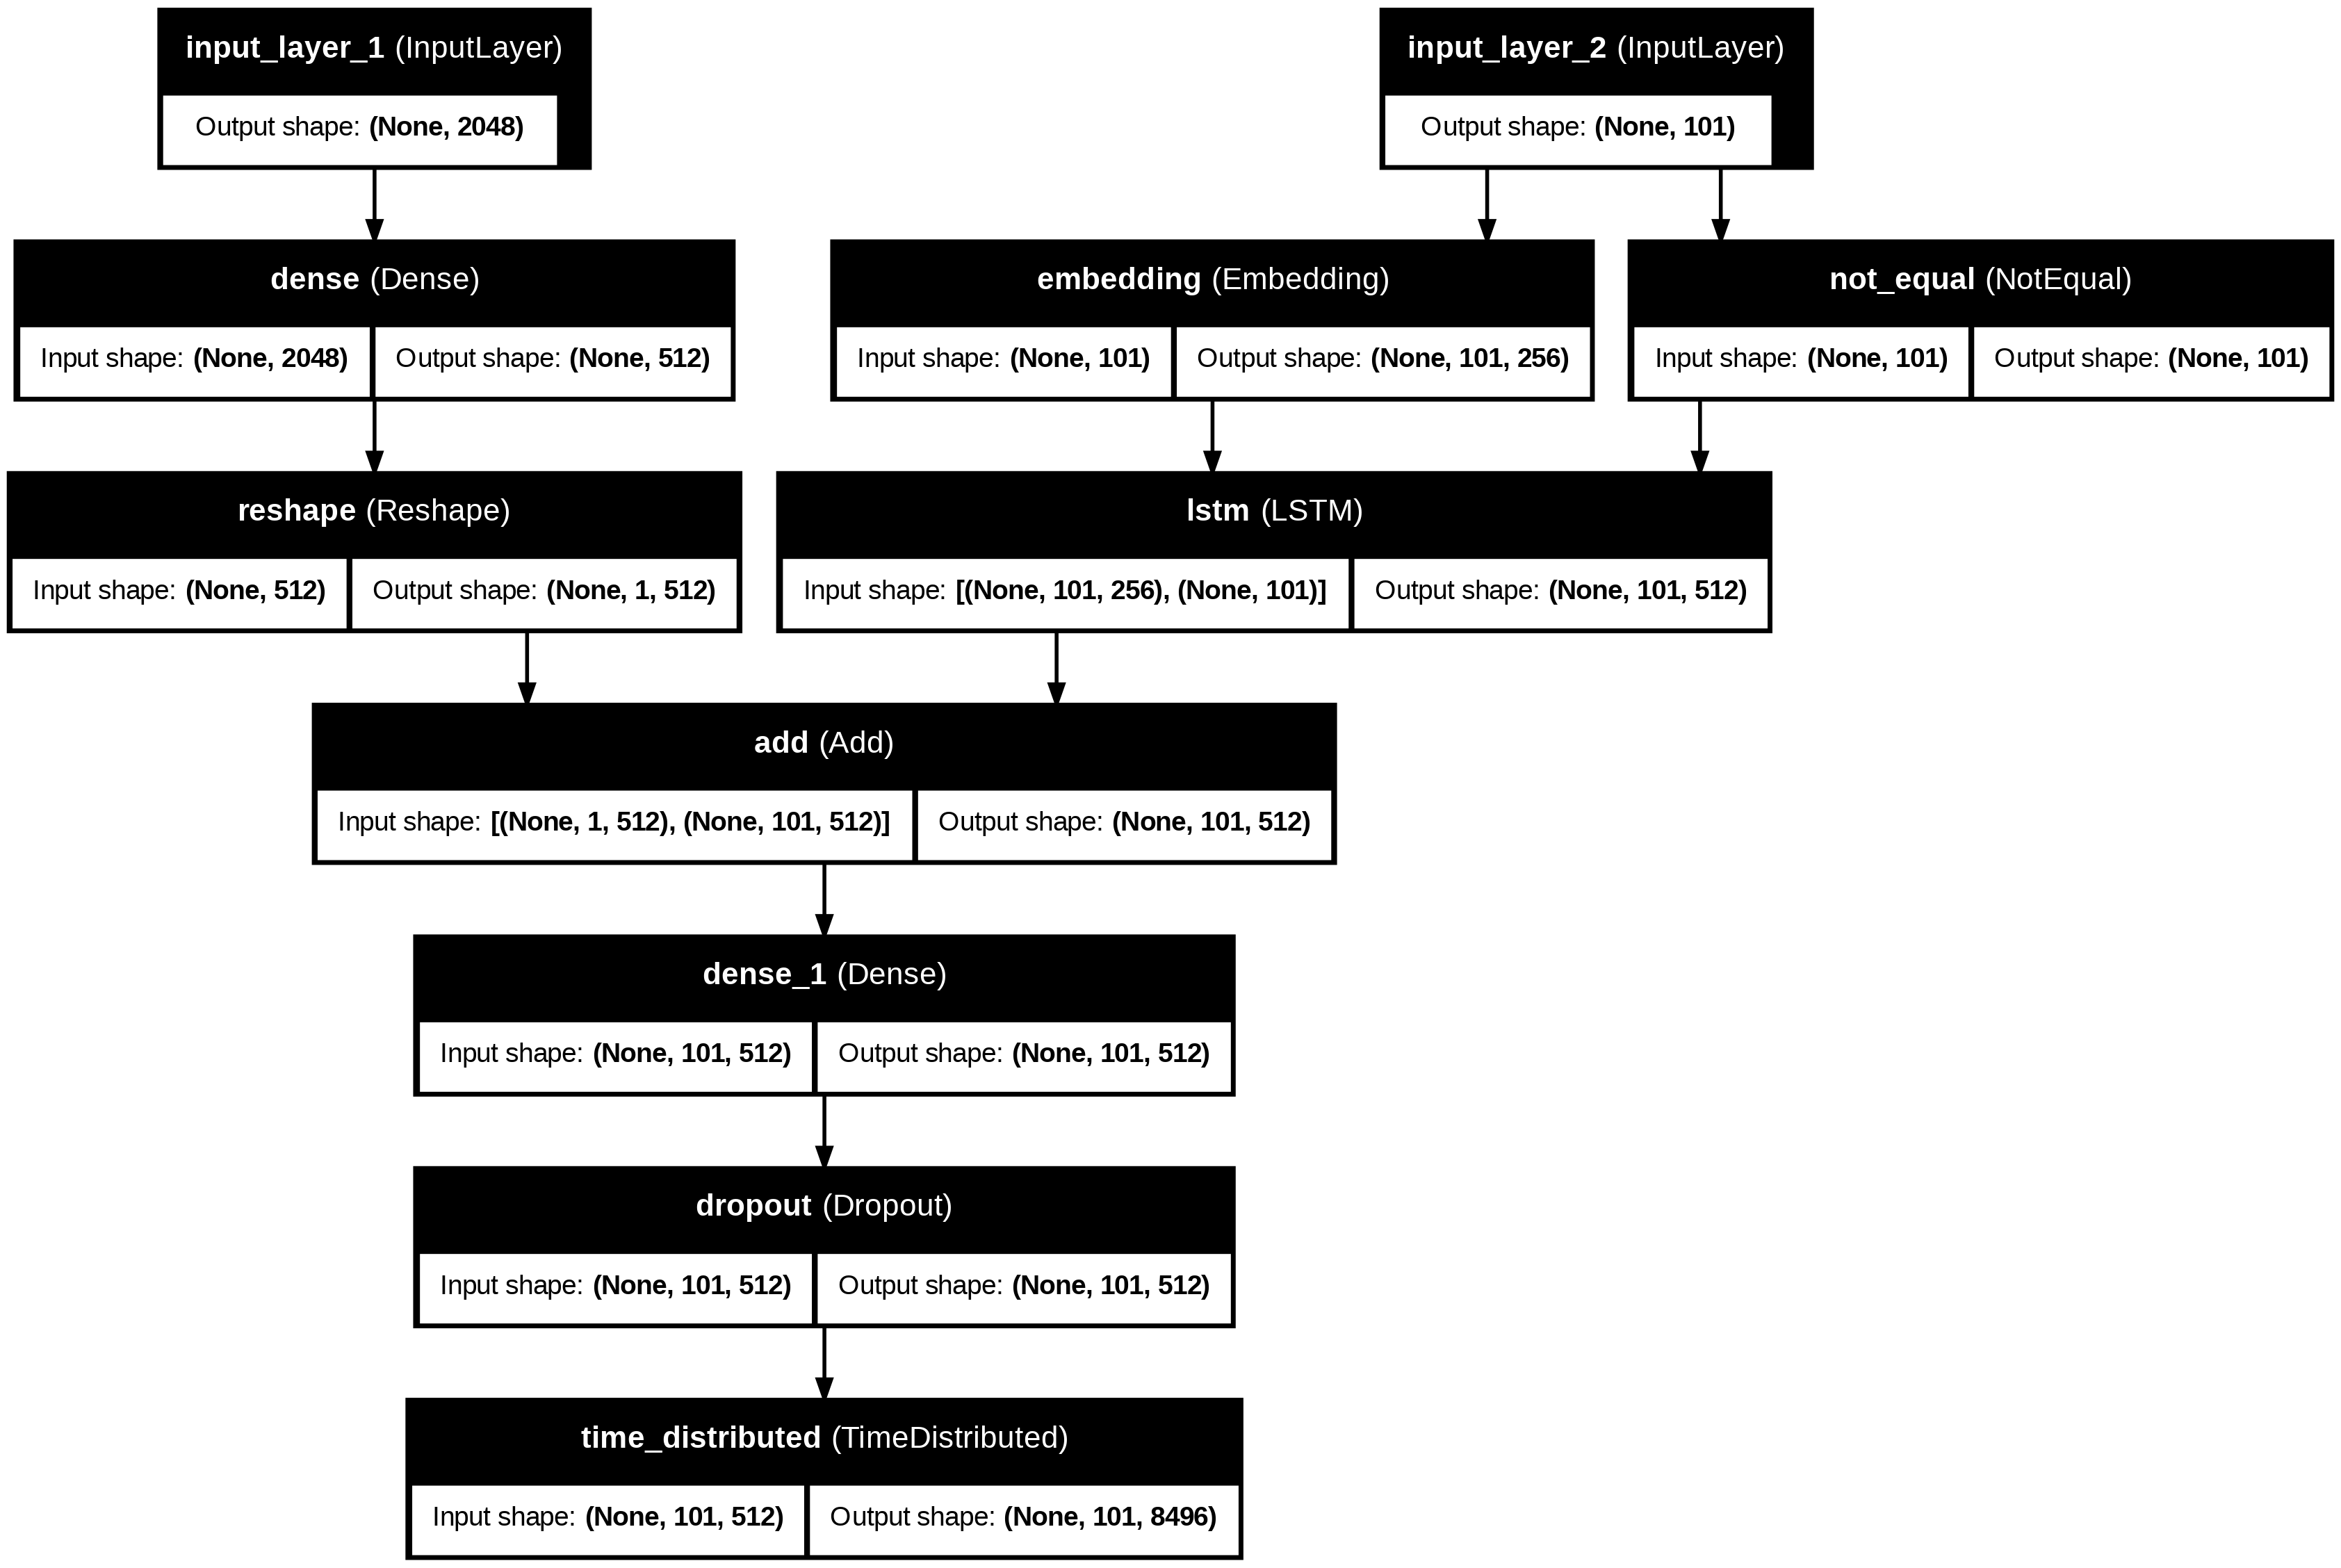

In [38]:
from tensorflow.keras.utils import plot_model

plot_model(caption_model, show_shapes=True, show_layer_names=True)

In [39]:


# Train the model
hist = caption_model.fit(
    [X_images_flat, X_texts_flat],  # Image and text inputs
    y_labels_flat,  # Target captions
    epochs=20,
    batch_size=64,
    validation_split=0.2
)

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 200ms/step - loss: 3.0431 - val_loss: 0.8041
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 171ms/step - loss: 0.6540 - val_loss: 0.1554
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 179ms/step - loss: 0.1130 - val_loss: 0.0078
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 179ms/step - loss: 0.0154 - val_loss: 0.0027
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 169ms/step - loss: 0.0067 - val_loss: 0.0018
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 178ms/step - loss: 0.0044 - val_loss: 0.0015
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 169ms/step - loss: 0.0036 - val_loss: 0.0013
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 177ms/step - loss: 0.0028 - val_loss: 0.0013
Epoch 9/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 177ms/step - loss: 0.0024 - val_loss: 0.0012
Epoch 10/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 169ms/step - loss: 0.0023 - val_loss: 0.0012
Epoch 11/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 170ms/step - loss: 0.0019 - val_loss: 0.0012
Epoch 12/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 20